In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models import Doc2Vec

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# GET DATA USED IN DOC2VEC MODEL
df = pd.read_csv('./data/final_df.csv')
print('Number of articles & blogs:',df.shape[0])
countries = set(df['country'].values)
print('Number of distinct countries:',len(countries))
df.head()

Number of articles & blogs: 34012
Number of distinct countries: 157


,href,title,country,text,all_words,subreddit,selftext,subreddit_subscribers
0,/review-vair-spa-borgo-egnazia-puglia-italy/,​Was It All Just a Dream? Tales from Heavenly ...,Italy,An ultra-serene spa experience designed to ele...,​Was It All Just a Dream? Tales from Heavenly ...,NaN,NaN,NaN
1,/belmond-hotel-villa-sant-andrea-taormina-sicily/,Zone Out on the Beach in Sicily at Belmond Vil...,Italy,Fathom contributing editor Christina Ohly foun...,Zone Out on the Beach in Sicily at Belmond Vil...,NaN,NaN,NaN
2,/safari-zambia-zimbabwe-africa/,"Zim, Zam, Zowie and the Wonders of Safari",Zimbabwe,Fathom's contributing koan editor James Sturz ...,"Zim, Zam, Zowie and the Wonders of SafariFatho...",NaN,NaN,NaN
3,/reader-story-zach-galifianakis-austria/,Zach Galifianakis Doppelganger Storms Austrian...,Austria,"The first time I visited Austria, my cousins H...",Zach Galifianakis Doppelganger Storms Austrian...,NaN,NaN,NaN
4,/summer-sardinia-beach-vacation-photos/,Your Vacation in Sardinia Could Look Like This,Italy,"SARDINIA, Italy – Ashley Muir Bruhn of Hither ...",Your Vacation in Sardinia Could Look Like This...,NaN,NaN,NaN


In [3]:
# LOAD DOC2VEC MODEL
model= Doc2Vec.load("d2v_model.bin")

# GET PARAGRAPH VECTORS FOR EACH COUNTRY
vecs = []
for c in countries:
    vec = {}
    vec['actual_country'] = c
    vec['similar_country'] = model.docvecs[c]
    vecs.append(vec)

df_vec = pd.DataFrame(vecs)
df_vec

,actual_country,similar_country
0,Denmark,"[-0.25027588, -0.19485343, -0.15605883, -0.033..."
1,Brazil,"[-0.14759296, -0.25749838, -0.10594124, 0.0802..."
2,Azerbaijan,"[-0.29741585, -0.22597809, -0.19733015, -0.208..."
3,Romania,"[-0.2745337, -0.21709527, -0.16349569, -0.0318..."
4,Myanmar,"[-0.19162206, -0.19294949, -0.10495523, 0.0216..."
...,...,...
152,Laos,"[-0.18510579, -0.24283269, -0.09465823, 0.0551..."
153,Lebanon,"[-0.20992748, -0.11613014, -0.09594596, -0.052..."
154,Yemen,"[-0.23465003, -0.45589745, -0.18578881, -0.322..."
155,Nepal,"[-0.12676537, -0.25242588, -0.07711986, 0.0978..."


In [4]:
# CONVERT PARAGRAPH VECTORS TO A DATAFRAME
vectors = []
for c in range(len(df_vec)):
    v = {}
    v['country'] = df_vec['actual_country'][c]
    for n in range(len(df_vec['similar_country'][0])):
        v[n] = df_vec['similar_country'][c][n]
    vectors.append(v)

df_vecs = pd.DataFrame(vectors)
df_vecs.head()

,country,0,1,2,3,4,5,6,7,8,...,140,141,142,143,144,145,146,147,148,149
0,Denmark,-0.250276,-0.194853,-0.156059,-0.033233,-0.018035,-0.221400,-0.033748,-0.002385,0.028204,...,0.207904,0.077152,-0.099437,-0.380353,0.201893,0.187560,-0.312214,-0.180245,-0.116767,-0.081996
1,Brazil,-0.147593,-0.257498,-0.105941,0.080206,0.138397,-0.268677,0.024573,-0.205105,-0.043064,...,0.146457,0.122104,-0.168077,-0.417471,0.084133,-0.008087,-0.448180,-0.136742,-0.087465,-0.097693
2,Azerbaijan,-0.297416,-0.225978,-0.197330,-0.208535,-0.026804,-0.168769,-0.163172,0.116456,-0.009298,...,0.085065,0.097787,-0.039164,-0.359899,0.337045,0.261938,-0.279979,-0.139306,-0.182202,0.004962
3,Romania,-0.274534,-0.217095,-0.163496,-0.031879,-0.007209,-0.245316,-0.035070,-0.024801,0.029343,...,0.229285,0.089589,-0.115218,-0.419696,0.208193,0.184599,-0.355959,-0.197248,-0.125307,-0.080987
4,Myanmar,-0.191622,-0.192949,-0.104955,0.021685,0.039305,-0.226966,0.003778,-0.074164,0.003907,...,0.191250,0.075055,-0.117862,-0.351504,0.125850,0.093636,-0.343553,-0.162452,-0.089143,-0.077822


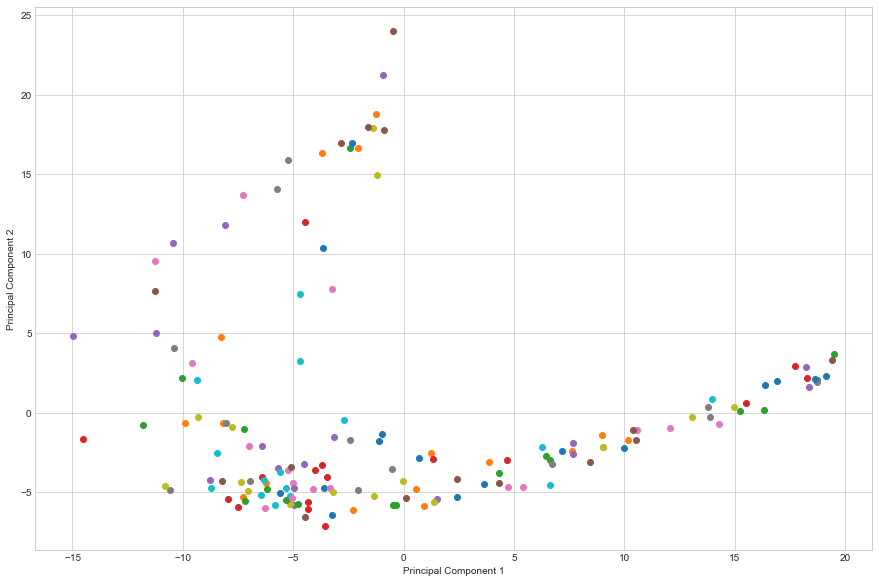

In [5]:
pca = PCA(n_components=2)
X = df_vecs.drop(columns='country').values
X_std = StandardScaler().fit_transform(X)
X_pca = pca.fit_transform(X_std)

y = df_vecs['country']


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 10))
    for n in range(len(X_pca)):
        plt.scatter(X_pca[n, 0],
                    X_pca[n, 1])
        
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.savefig('./images/pca_country_scatter.png')
    plt.show()

# adapted from http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

In [6]:
pcas = []
for n in range(len(X_pca)):
    pc = {}
    pc['1'] = X_pca[n, 0]
    pc['2'] = X_pca[n, 1]
    pc['c'] = y[n]
    pcas.append(pc)

df_comp = pd.DataFrame(pcas)
df_comp.head()

,1,2,c
0,-3.611660,-4.769774,Denmark
1,7.645736,-2.382300,Brazil
2,-10.049329,2.184792,Azerbaijan
3,-3.481386,-4.023649,Romania
4,1.528418,-5.436362,Myanmar


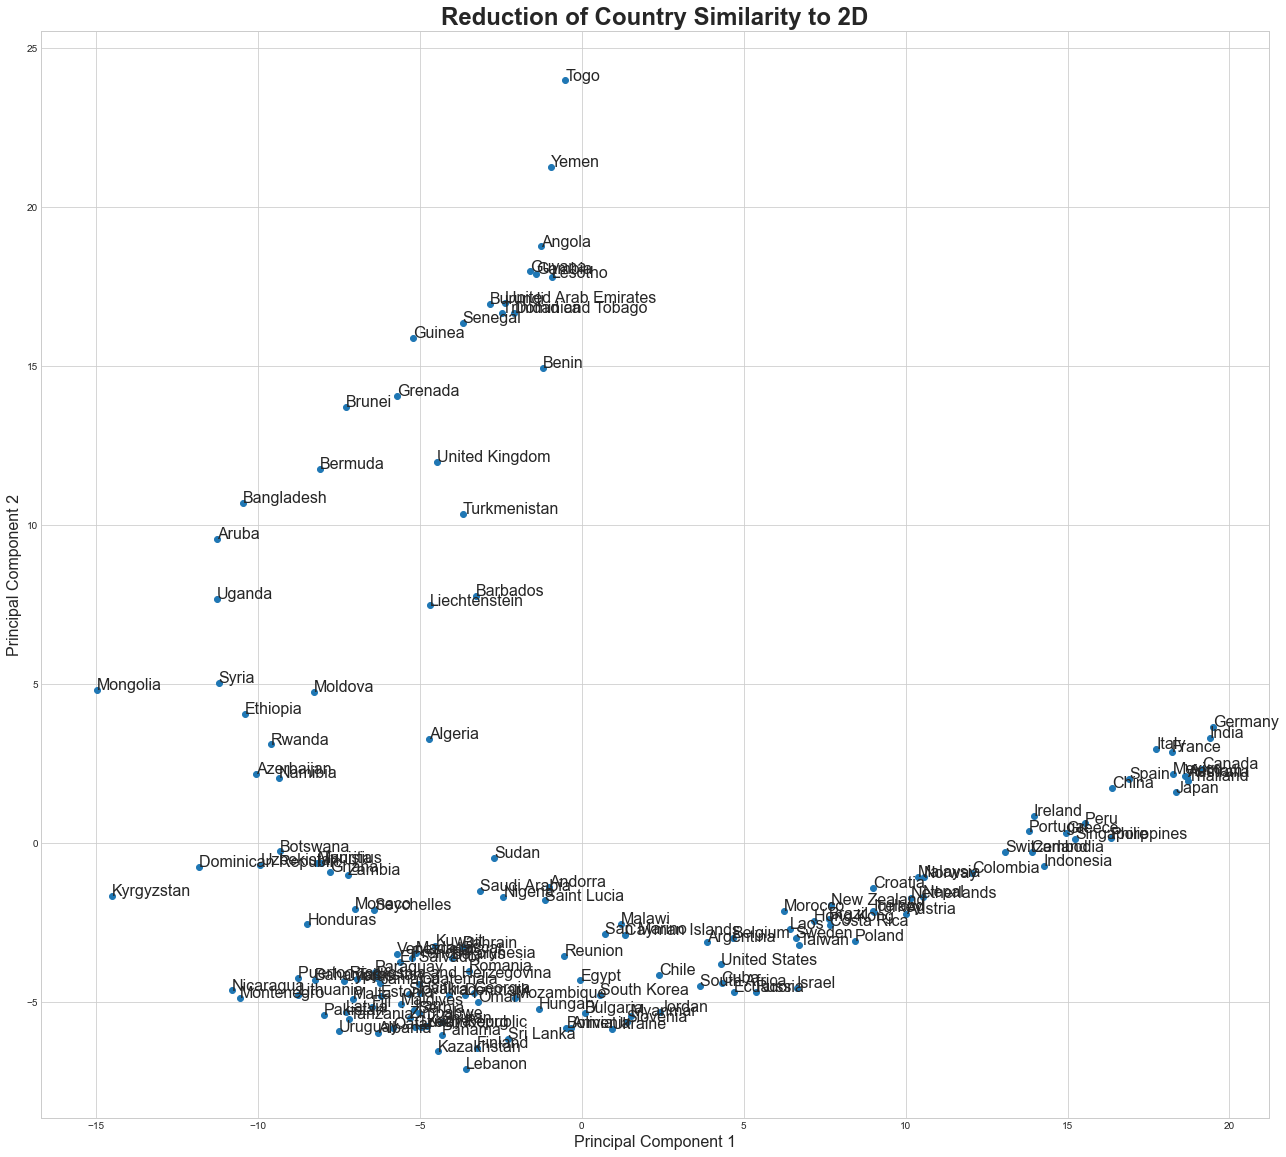

In [7]:
with plt.style.context('seaborn-whitegrid'):

    fig, ax = plt.subplots(figsize=(22, 20))
    plt.scatter(df_comp['1'], df_comp['2'])
    plt.title('Reduction of Country Similarity to 2D', fontsize = 24,fontweight="bold")
    plt.xlabel('Principal Component 1', fontsize = 16)
    plt.ylabel('Principal Component 2', fontsize = 16)
    
    for i, txt in enumerate(y):
        ax.annotate(txt, (df_comp['1'][i], df_comp['2'][i]), fontsize = 16, fontweight="light")

    plt.savefig('./images/labeled_country_scatter.png')
    plt.show()
